In [74]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
from numpy import argmax
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

In [144]:
data=pd.read_csv("/home/ubuntu/ML/titanic/train.csv")
print(data.shape)
data.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Number of Survived:  342
Number of not Survived :  549


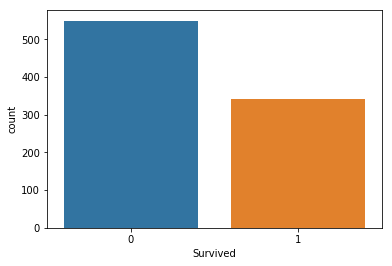

In [3]:
# Count Plot
ax = sns.countplot(data['Survived'],label="Count")
notSurvived,Survived = data['Survived'].value_counts()
print('Number of Survived: ',Survived)
print('Number of not Survived : ',notSurvived)
plt.show()

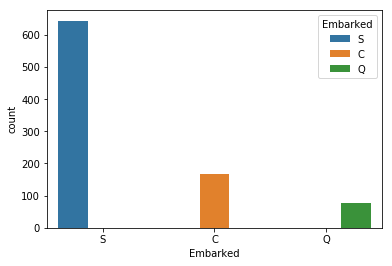

In [4]:
#print(x['Cabin'].value_counts());
#sns.countplot(x['Embarked'],label="Count")
sns.countplot(x="Embarked",hue="Embarked", data=data)
plt.show()

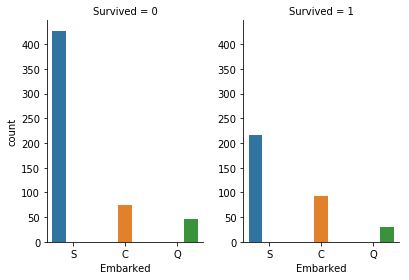

In [5]:
# factor Count Plot
sns.factorplot(x="Embarked", hue="Embarked", col="Survived",
data=data, kind="count",
size=4, aspect=.7);
plt.show()

In [127]:
# limit to categorical data using df.select_dtypes()
data.select_dtypes(include=[object]).head(3)

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S


In [90]:
#data.describe() # by defualt numerical data
data.describe(include='all') # for all type of data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Farrell, Mr. James",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [128]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [140]:
data['Age']=data['Age'].fillna(data['Age'].mean()).astype(int)
# Replace NA with Fowrad/Backward Filling
data.fillna(method='ffill',inplace=True)
data.fillna(method='bfill',inplace=True)

data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [146]:
data.dropna(axis=0, how='any',inplace=True)
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<b>Feature Engineering?</b><br> 1. OneHotEncoding

In [159]:
data=pd.read_csv("/home/ubuntu/ML/titanic/train.csv")
data.dropna(axis=0, how='any',inplace=True)
print(data.shape)
data.isnull().sum()
#data.head()

(183, 12)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [179]:
#def encoder(data):
##'Map the categorical variables to numbers to work with scikit learn'
#for col in data.columns:
#    if data.dtypes[col] == "object":
#        le = LabelEncoder()
#        le.fit(data[col])
#        data[col] = le.transform(data[col])
#return data

def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        oe = OneHotEncoder(sparse=False)
        print("Total columnsToEncode",columnsToEncode)
        for feature in columnsToEncode:
            try:
                name_integer_encoded = le.fit_transform(df[feature])
                #print("Integer encoding",df[feature])
                name_integer_encoded = name_integer_encoded.reshape(len(name_integer_encoded), 1)
                name_onehot_encoded = oe.fit_transform(name_integer_encoded)
                print(feature,name_onehot_encoded.shape,df[feature].shape)
                #print("OneHot encoding",df[feature])
                #df[feature] = oe.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return "Done"

In [180]:
dummyEncode(data)
#data

Total columnsToEncode ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Name (183, 183) (183,)
Sex (183, 2) (183,)
Ticket (183, 127) (183,)
Cabin (183, 133) (183,)
Embarked (183, 3) (183,)


'Done'

In [11]:
# integer encode
name_label_encoder = LabelEncoder()
sex_label_encoder = LabelEncoder()
ticket_label_encoder = LabelEncoder()
cabin_label_encoder = LabelEncoder()
embarked_label_encoder = LabelEncoder()

name_integer_encoded = name_label_encoder.fit_transform(data['Name'])
sex_integer_encoded = sex_label_encoder.fit_transform(data['Sex'])
ticket_integer_encoded = ticket_label_encoder.fit_transform(data['Ticket'])
cabin_integer_encoded = cabin_label_encoder.fit_transform(data['Cabin'].astype(str))
embarked_integer_encoded = embarked_label_encoder.fit_transform(data['Embarked'].astype(str))

#decoded=age_label_encoder.inverse_transform(age_integer_encoded)

# binary encode
name_integer_encoded = name_integer_encoded.reshape(len(name_integer_encoded), 1)
sex_integer_encoded = sex_integer_encoded.reshape(len(sex_integer_encoded), 1)
ticket_integer_encoded = ticket_integer_encoded.reshape(len(ticket_integer_encoded), 1)
cabin_integer_encoded = cabin_integer_encoded.reshape(len(cabin_integer_encoded), 1)
embarked_integer_encoded = embarked_integer_encoded.reshape(len(embarked_integer_encoded), 1)

name_onehot_encoder = OneHotEncoder(sparse=False)
sex_onehot_encoder = OneHotEncoder(sparse=False)
ticket_onehot_encoder = OneHotEncoder(sparse=False)
cabin_onehot_encoder = OneHotEncoder(sparse=False)
embarked_onehot_encoder = OneHotEncoder(sparse=False)

name_onehot_encoded = name_onehot_encoder.fit_transform(name_integer_encoded)
sex_onehot_encoded = sex_onehot_encoder.fit_transform(sex_integer_encoded)
ticket_onehot_encoded = ticket_onehot_encoder.fit_transform(ticket_integer_encoded)
cabin_onehot_encoded = cabin_onehot_encoder.fit_transform(cabin_integer_encoded)
embarked_onehot_encoded = embarked_onehot_encoder.fit_transform(embarked_integer_encoded)

#print(x['Sex'])
#print(sex_integer_encoded)
#print(sex_onehot_encoded)


data['Name']=name_onehot_encoded
data['Sex']=sex_onehot_encoded
data['Ticket']=ticket_onehot_encoded
data['Cabin']=cabin_onehot_encoded
data['Embarked']=embarked_onehot_encoded

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0.0,0.0,22,1,0,0.0,7.2500,0.0,0.0
1,2,1,1,0.0,1.0,38,1,0,0.0,71.2833,0.0,1.0
2,3,1,3,0.0,1.0,26,0,0,0.0,7.9250,0.0,0.0
3,4,1,1,0.0,1.0,35,1,0,0.0,53.1000,0.0,0.0
4,5,0,3,0.0,0.0,35,0,0,0.0,8.0500,0.0,0.0


<b>What if we want to observe all correlation between features?</b><br> Yes, you are right. The answer is heatmap that is old but powerful plot method

In [12]:
y=data.Survived
x=data.drop(['Survived'],axis = 1)

             PassengerId    Pclass      Name       Sex       Age     SibSp  \
PassengerId     1.000000 -0.035144  0.052129 -0.042939  0.033741 -0.057527   
Pclass         -0.035144  1.000000  0.027734 -0.131900 -0.335071  0.083081   
Name            0.052129  0.027734  1.000000 -0.024728  0.032101 -0.015907   
Sex            -0.042939 -0.131900 -0.024728  1.000000 -0.082533  0.114631   
Age             0.033741 -0.335071  0.032101 -0.082533  1.000000 -0.232743   
SibSp          -0.057527  0.083081 -0.015907  0.114631 -0.232743  1.000000   
Parch          -0.001652  0.018443 -0.015878  0.245489 -0.176744  0.414838   
Ticket          0.013935 -0.091028 -0.001948  0.078791 -0.014349 -0.027582   
Fare            0.012658 -0.549500 -0.016640  0.182333  0.093856  0.159651   
Cabin           0.025540 -0.017519 -0.001590 -0.034990  0.010779 -0.022508   
Embarked       -0.005476 -0.247223 -0.016217  0.086546  0.032577 -0.060751   

                Parch    Ticket      Fare     Cabin  Embarked  

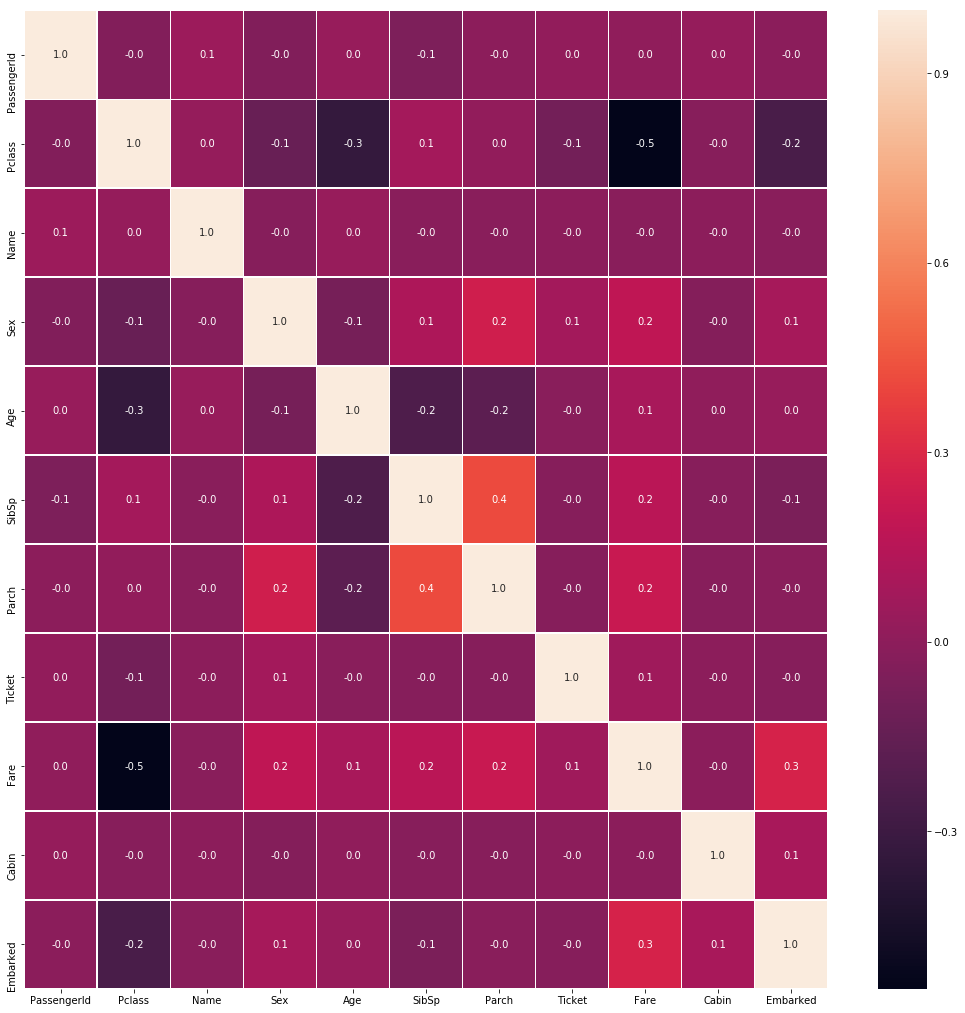

In [13]:
#correlation map

print(x.corr())
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

<b>Feature Selection and Random Forest Classification</b><br><br>

In this part we will select feature with different methods that are feature selection with correlation, univariate feature selection, recursive feature elimination (RFE), recursive feature elimination with cross validation (RFECV) and tree based feature selection. We will use random forest classification in order to train our model and predict.

<b>1) Feature selection with correlation and random forest classification</b>

As it can be seen in map heat figure no features are correlated with each other so we can't remove any features using this method.

<b>2) Univariate feature selection and random forest classification</b><br>
In univariate feature selection, we will use SelectKBest that removes all but the k highest scoring features. http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In this method we need to choose how many features we will use. For example, will k (number of features) be 5 or 10 or 15? The answer is only trying or intuitively. I do not try all combinations but I only choose k = 5 and find best 5 features.

In [36]:
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x, y)

In [37]:
print('Score list:', select_feature.scores_)
print('P Score list:', select_feature.pvalues_)

Score list: [  3.31293407e+00   3.08736994e+01   6.22950820e-01   1.70348127e+02
   2.34584442e+01   2.58186538e+00   1.00974991e+01   4.81578947e+00
   4.51831909e+03   1.24590164e+00   2.12319741e+01]
P Score list: [  6.87366651e-02   2.75378563e-08   4.29952852e-01   6.21058490e-39
   1.27641239e-06   1.08094210e-01   1.48470676e-03   2.82001511e-02
   0.00000000e+00   2.64336688e-01   4.06919270e-06]


In [38]:
print('Feature list:', x.columns)

Feature list: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [41]:
x_train_2 = select_feature.transform(x)
clf_rf_2 = RandomForestClassifier()

scores = cross_val_score(clf_rf_2, x_train_2, y, cv=5,scoring='accuracy')

print('Accuracy is: ',scores.mean())

Accuracy is:  0.798064463734


<b>3) Recursive feature elimination (RFE) with random forest</b><br>
http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html Basically, it uses one of the classification methods (random forest in our example), assign weights to each of features. Whose absolute weights are the smallest are pruned from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features

Like previous method, we will use 5 features. However, which 5 features will we use ? We will choose them with RFE method.

In [43]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x, y)

In [55]:
print('Chosen best 5 feature by rfe:',x.columns[rfe.support_])
print('Chosen best 5 feature by rfe:',rfe.ranking_)

Chosen best 5 feature by rfe: Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare'], dtype='object')
Chosen best 5 feature by rfe: [1 1 7 1 1 2 3 6 1 5 4]


In [56]:
scores = cross_val_score(rfe, x, y, cv=5,scoring='accuracy')

print('Accuracy is: ',scores.mean())

Accuracy is:  0.794762937768


<b>4) Recursive feature elimination with cross validation and random forest classification</b><br>
http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html Now we will not only find best features but we also find how many features do we need for best accuracy.

In [66]:
x_new=x.drop(['PassengerId'],axis=1);

from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_new, y)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_new.columns[rfecv.support_])

scores = cross_val_score(rfecv, x_new, y, cv=5,scoring='accuracy')

print('Accuracy is: ',scores.mean())

Optimal number of features : 4
Best features : Index(['Pclass', 'Sex', 'Age', 'Fare'], dtype='object')
Accuracy is:  0.809250060377


In [94]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,C123,S
5,6,0,3,"Moran, Mr. James",male,29,0,0,330877,8.4583,C123,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,E46,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,E46,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,E46,C


In [106]:
# integer encode
name_label_encoder = LabelEncoder()
name_integer_encoded = name_label_encoder.fit_transform(data['Name'])

# binary encode
name_integer_encoded = name_integer_encoded.reshape(len(name_integer_encoded), 1)
name_onehot_encoder = OneHotEncoder(sparse=False)
name_onehot_encoded = name_onehot_encoder.fit_transform(name_integer_encoded)

print("n_values_ ",name_onehot_encoder.n_values_)
#print("active_features_ ",name_onehot_encoder.active_features_)

#print(data['Name'])
print(name_integer_encoded)
print(name_onehot_encoded)


#data['Name']=name_onehot_encoded

data.head()

n_values_  [891]
[[108]
 [190]
 [353]
 [272]
 [ 15]
 [554]
 [515]
 [624]
 [412]
 [576]
 [727]
 [ 95]
 [729]
 [ 28]
 [840]
 [359]
 [682]
 [867]
 [839]
 [512]
 [273]
 [ 80]
 [523]
 [765]
 [626]
 [ 44]
 [240]
 [260]
 [605]
 [813]
 [828]
 [776]
 [289]
 [856]
 [535]
 [372]
 [505]
 [134]
 [837]
 [589]
 [  7]
 [827]
 [446]
 [456]
 [212]
 [697]
 [473]
 [604]
 [726]
 [ 38]
 [629]
 [594]
 [333]
 [246]
 [620]
 [873]
 [707]
 [595]
 [853]
 [299]
 [749]
 [385]
 [337]
 [755]
 [784]
 [560]
 [596]
 [185]
 [ 25]
 [440]
 [396]
 [300]
 [376]
 [161]
 [ 87]
 [546]
 [778]
 [563]
 [127]
 [223]
 [842]
 [737]
 [519]
 [141]
 [386]
 [ 52]
 [255]
 [764]
 [259]
 [149]
 [159]
 [ 31]
 [150]
 [209]
 [184]
 [740]
 [292]
 [308]
 [219]
 [422]
 [656]
 [658]
 [858]
 [405]
 [312]
 [542]
 [724]
 [559]
 [675]
 [552]
 [667]
 [882]
 [ 67]
 [417]
 [ 46]
 [645]
 [178]
 [826]
 [ 70]
 [ 24]
 [362]
 [551]
 [575]
 [848]
 [857]
 [588]
 [525]
 [499]
 [653]
 [234]
 [225]
 [165]
 [695]
 [851]
 [772]
 [685]
 [585]
 [271]
 [618]
 [282]
 [ 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,C123,S


In [102]:
inverted = name_label_encoder.inverse_transform(name_integer_encoded)
print(inverted)

AttributeError: 'OneHotEncoder' object has no attribute 'inverse_transform'